# (Ford GoBike System Data Exploration)
## by (Renad Alowibdi)

## Preliminary Wrangling

> Ford GoBike is an electric bike let you go farther faster, and up hills. It's more popular in San Francisco since biking is the fastest growing mode of transportation there. Ford GoBike is expanding to the East Bay — in Oakland, Emeryville and Berkeley — and to San Jose in the South Bay. Ford GoBike system data will be used to explore to discover bunch of interesting things and then explain it through this project. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# Read the first 5 rows of the imported dataset:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
# Read dataset general information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
# Change start_time and end_time columns data type from string to date type:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [6]:
# Change start_station_id, end_station_id and bike_id columns data type from integer to string type:
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

In [7]:
# Read dataset general information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  object        
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  object        
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  object        
 12  user_type       

In [8]:
# Check for duplicate rows:
df.duplicated().sum()

0

In [9]:
# Count number of unique values in each variable:
df.nunique()

duration_sec                13490
start_time                 519688
end_time                   519681
start_station_id              272
start_station_name            272
start_station_latitude        272
start_station_longitude       272
end_station_id                272
end_station_name              272
end_station_latitude          272
end_station_longitude         272
bike_id                      3673
user_type                       2
dtype: int64

In [10]:
# Check number of null values for each variable:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [14]:
# Show dataset brief descriptive statistics: 
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,37.771653,-122.363927,37.771844,-122.363236
std,3444.146451,0.086305,0.105573,0.086224,0.105122
min,61.000000,37.317298,-122.444293,37.317298,-122.444293
25%,382.000000,37.773492,-122.411726,37.774520,-122.410345
50%,596.000000,37.783521,-122.398870,37.783830,-122.398525
75%,938.000000,37.795392,-122.391034,37.795392,-122.391034
max,86369.000000,37.880222,-121.874119,37.880222,-121.874119


### What is the structure of your dataset?

> There are several characteristics that define Ford GoBike data set's structure and properties. The data consists of 519700 records and 13 variables. The start and end time of the bike ride, the duration for the bike ride, the start and end station name, id and coordinations, the bike id, and the user type whether he is a subscriber or a customer. The variables characteristics are string data type for all id variables, the places name, and the user type. As for the time variables the data type is a date. The data's mean for all duration of rides is 1099 seconds. The minimum duration time is 61 seconds and the maximum duration time is 86369 seconds.

### What is the main feature of interest in your dataset?

> It is interesting to think about the high variability between the minimum and the maximum time spent on a bike ride from different perspectives. Does the short time durations relate to specific user type? In which start station name and end station name does a short time duration appears? What are the top 5 frequent places for all users types? 

## Univariate Exploration

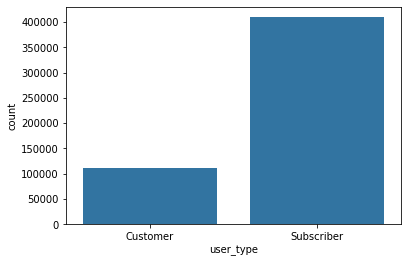

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x= 'user_type', color = base_color);

**The user types are listed on the horizontal axis, and their frequencies are shown on the vertical axis. We can see that subscribers are the most common user type while customers are the least common type for Ford GoBike riders.**

**Because of extremely large numbers of names in the start stations and end stations, it is difficult to interpret the data in such a manner to answer the questions. So, between sampling, transparency, and jitter. This problem can be resolve using sampling. Hence, the data will be focused on the top 5 start stations and top 5 end stations.**

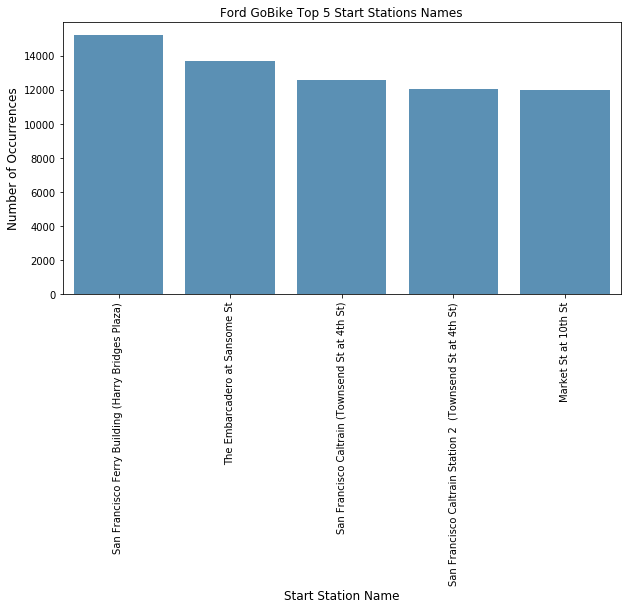

In [16]:
# data set up
start_name_count  = df['start_station_name'].value_counts()
start_name_count  = start_name_count[:5,]
# plotting
plt.figure(figsize=(10,5))
sb.barplot(start_name_count.index, start_name_count.values, alpha=0.8, color = base_color )
plt.title('Ford GoBike Top 5 Start Stations Names')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Start Station Name', fontsize=12)
plt.xticks(rotation = 90);
plt.show()

**The above bar chart represents the top 5 start station names for the GoBike all riders for both users types. As shown, San Francisco Ferry Building (Harry Bridges Plaza) is at the top among all other start stations with more than 14000 records. Means that most of the people start their bike rides from San Francisco Ferry Building (Harry Bridges Plaza)**

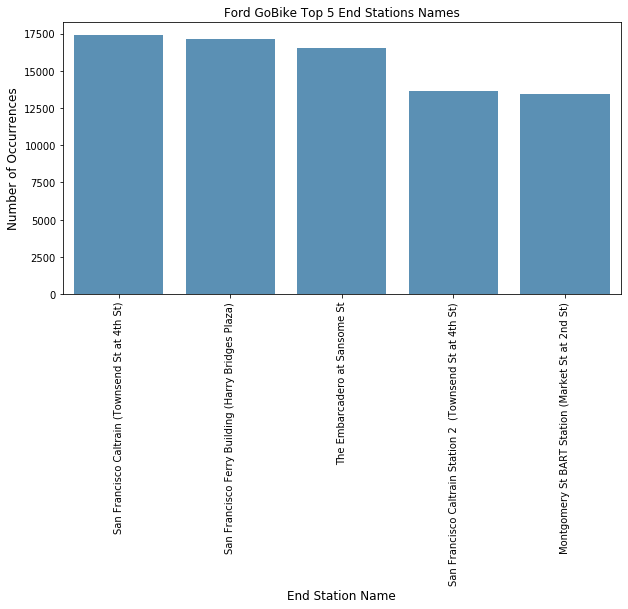

In [17]:
# data set up
end_name_count  = df['end_station_name'].value_counts()
end_name_count  = end_name_count[:5,]
# plotting
plt.figure(figsize=(10,5))
sb.barplot(end_name_count.index, end_name_count.values, alpha=0.8, color = base_color )
plt.title('Ford GoBike Top 5 End Stations Names')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('End Station Name', fontsize=12)
plt.xticks(rotation = 90);
plt.show()

**The above bar chart represents the top 5 end station names for the GoBike all riders for both users types. As shown, San Francisco Caltrain (Townsend St at 4th St) is at the top of all other end stations. Means that most of the people end their bike rides in San Francisco Caltrain (Townsend St at 4th St).**

**To investigate and understand these results furthermore. The question: Which user type represents the bike riders in the most frequent places? will be answered by adding a variable to the univariate plot to be a bivariate plot.**

## Bivariate Exploration

**At the beginning, to answer the questions. It is preferable to adjust the data by dividing it into two sections to study each section individually. The first sub-set of the data includes the top 5 start stations names, and the second sub-set of the data includes the top 5 end stations names.** 

In [77]:
# The first sub-set of the data 
top5_start_df  = df.query('start_station_name in ["San Francisco Ferry Building (Harry Bridges Plaza)","The Embarcadero at Sansome St","San Francisco Caltrain (Townsend St at 4th St)","San Francisco Caltrain Station 2  (Townsend St at 4th St)","Market St at 10th St"]')

In [79]:
# The second sub-set of the data
top5_end_df = df.query('end_station_name in ["San Francisco Caltrain (Townsend St at 4th St)","San Francisco Ferry Building (Harry Bridges Plaza)","The Embarcadero at Sansome St", "San Francisco Caltrain Station 2  (Townsend St at 4th St)","Montgomery St BART Station (Market St at 2nd St)"]')

Text(0.5, 1, 'Top 5 Start Station Name User Type')

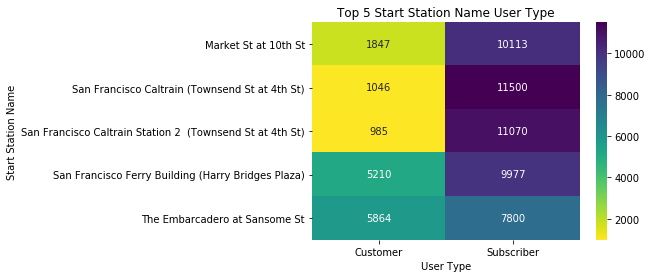

In [87]:
# data set up
df_start_counts = top5_start_df.groupby(['start_station_name','user_type']).size()
df_start_counts = df_start_counts.reset_index(name = 'count')
df_start_counts = df_start_counts.pivot(index = 'start_station_name', columns = 'user_type', values = 'count')
# plotting 
sb.heatmap(df_start_counts,annot = True, fmt = 'd', cmap = 'viridis_r');
plt.xlabel('User Type')
plt.ylabel('Start Station Name')
plt.title('Top 5 Start Station Name User Type')

**In general it can be noticed that the top 5 start stations are mostly represented by subscribers more than normal customers. This is logically true since subscribers usually subscribe to the system for frequent routine rides while customers usually tend to use Ford GoBike rides for unfrequented or unplanned ride. The first top start station San Francisco Ferry Building (Harry Bridges Plaza) had 9977 subscribers while 5210 customers.**

Adding the user type variable to the plot to investigate the insight 

Text(0.5, 1, 'Top 5 End Station Name User Type')

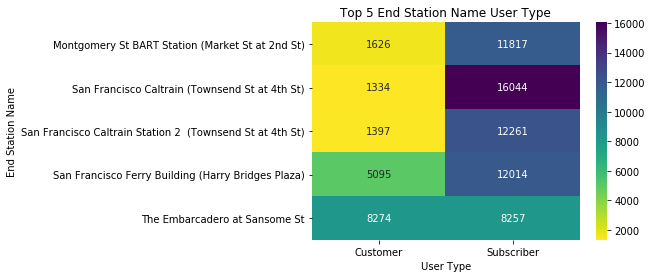

In [86]:
# data set up
df_end_counts = top5_end_df.groupby(['end_station_name','user_type']).size()
df_end_counts = df_end_counts.reset_index(name = 'count')
df_end_counts = df_end_counts.pivot(index = 'end_station_name', columns = 'user_type', values = 'count')
# plotting 
sb.heatmap(df_end_counts,annot = True, fmt = 'd', cmap = 'viridis_r');
plt.xlabel('User Type')
plt.ylabel('End Station Name')
plt.title('Top 5 End Station Name User Type')

**For the above plot as well, the top 5 end stations are mostly represented by subscribers more than customers probably for the same reason of having a routine. The first top end station San Francisco Caltrain (Townsend St at 4th St) had 16044 subscribers while 1334 customers.**

**In the above bivariate plots it can be noticed that there is a relationship between the frequent number of the stations and the user type. More frequent stations in the data belong to subscribers. To understand the relationship more and to be able to answer the question: Which user type takes a long time for a ride in the top 5 start stations and top 5 end stations? a third variable will be added to the plot in the multivariate exploration.**

## Multivariate Exploration

In [71]:
# data set up 
top5_st_duration_mean = top5_start_df.groupby(['start_station_name','user_type'])['duration_sec'].mean()
top5_st_duration_mean = top5_st_duration_mean.reset_index(name = 'count')
top5_st_duration_mean 

,start_station_name,user_type,count
0,Market St at 10th St,Customer,2165.904710
1,Market St at 10th St,Subscriber,621.832592
2,San Francisco Caltrain (Townsend St at 4th St),Customer,1987.025813
3,San Francisco Caltrain (Townsend St at 4th St),Subscriber,722.631826
4,San Francisco Caltrain Station 2 (Townsend St...,Customer,2044.717766
5,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,683.923848
6,San Francisco Ferry Building (Harry Bridges Pl...,Customer,3160.710365
7,San Francisco Ferry Building (Harry Bridges Pl...,Subscriber,695.923524
8,The Embarcadero at Sansome St,Customer,3022.108117
9,The Embarcadero at Sansome St,Subscriber,748.706154


Text(0.5, 1.0, 'Users Type Ride Duration for the Top 5 Start Station Name')

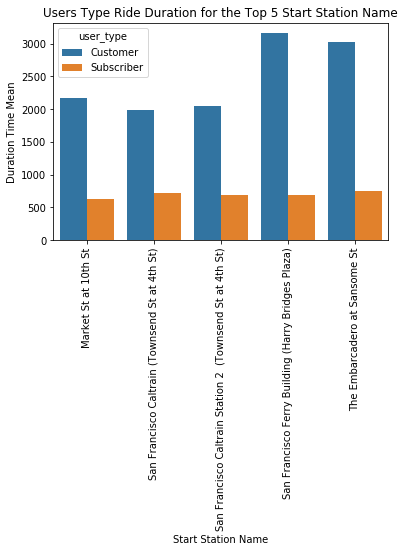

In [88]:
# Plotting
sb.barplot(data = top5_st_duration_mean , x='start_station_name', y='count', hue= 'user_type');
plt.xticks(rotation = 90)
plt.ylabel('Duration Time Mean')
plt.xlabel('Start Station Name')
plt.title('Users Type Ride Duration for the Top 5 Start Station Name')

**As shown from the plot, the mean for the ride duration for the customers is way higher than duration rides for subscribers for all top 5 start stations. These results were surprising! because at first, I thought that Ford GoBike subscribers need transportation routinely like to go for work or gym and it might be a long-distance for them. However, after searching for those top 5 places I found that many tourists visit those places and take a ride for a long time duration to enjoy view and weather in San Francisco.**    

In [74]:
# Data set up 
top5_end_duration_mean = top5_end_df.groupby(['end_station_name','user_type'])['duration_sec'].mean()
top5_end_duration_mean = top5_end_duration_mean.reset_index(name = 'count')
top5_end_duration_mean

,end_station_name,user_type,count
0,Montgomery St BART Station (Market St at 2nd St),Customer,2261.965560
1,Montgomery St BART Station (Market St at 2nd St),Subscriber,571.731573
2,San Francisco Caltrain (Townsend St at 4th St),Customer,1648.155172
3,San Francisco Caltrain (Townsend St at 4th St),Subscriber,644.997008
4,San Francisco Caltrain Station 2 (Townsend St...,Customer,1428.524696
5,San Francisco Caltrain Station 2 (Townsend St...,Subscriber,570.483076
6,San Francisco Ferry Building (Harry Bridges Pl...,Customer,2569.295191
7,San Francisco Ferry Building (Harry Bridges Pl...,Subscriber,638.811054
8,The Embarcadero at Sansome St,Customer,3290.530578
9,The Embarcadero at Sansome St,Subscriber,751.411045


Text(0.5, 1.0, 'Users Type Ride Duration for the Top 5 End Station Name')

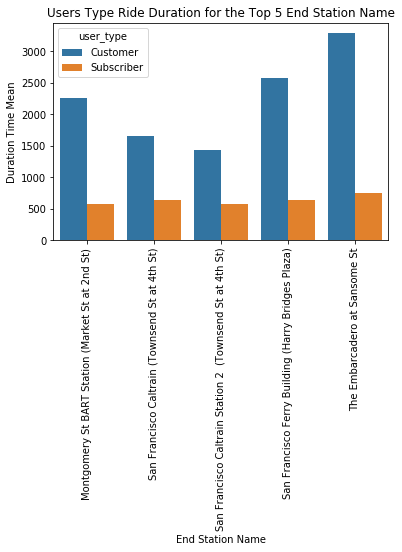

In [89]:
# Plotting
sb.barplot(data = top5_end_duration_mean , x='end_station_name', y='count', hue= 'user_type');
plt.xticks(rotation = 90)
plt.ylabel('Duration Time Mean')
plt.xlabel('End Station Name')
plt.title('Users Type Ride Duration for the Top 5 End Station Name')

**The plot above also shows the same outputs as the top 5 start stations. It can be noticed that customers also spend higher time duration for a ride than subscribers in the top 5 end stations.**